In [139]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
%matplotlib inline

In [140]:
#Load the train and test data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [141]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [145]:
#Print the total data details
print('Total: ' + str(len(train)+len(test)))
print('Training set: ' + str(len(train)))
print('test set: ' + str(len(test)))

Total: 1309
Training set: 891
test set: 418


In [146]:
#check for null values using isnull() function.
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [147]:
#check for null values using isnull() function.
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [148]:
#Plot the bar graph
def showChart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(12,8))

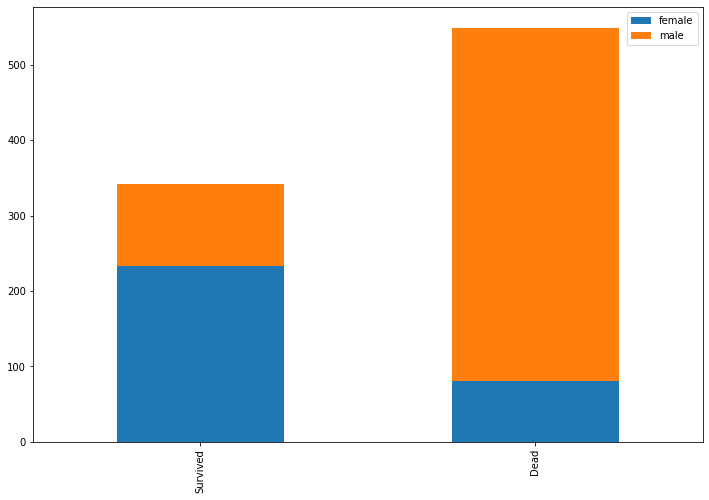

In [149]:
showChart('Sex')

In [150]:
#Age column has missing values. Fill missing values using median values
#calculate the median value for each Sex separately using groupby.

train["Age"].fillna(train.groupby('Sex')['Age'].transform("median"), inplace=True)
test["Age"].fillna(test.groupby('Sex')['Age'].transform("median"), inplace=True)


In [151]:
#put the passengers to four age groups

train.loc[train['Age'] <= 18, 'Age'] = 1
train.loc[(train['Age'] > 18) & (train['Age'] <= 40), 'Age'] = 2
train.loc[(train['Age'] > 40) & (train['Age'] <= 60), 'Age'] = 3
train.loc[train['Age'] > 60, 'Age'] = 4

test.loc[test['Age'] <= 18, 'Age'] = 1
test.loc[(test['Age'] > 18) & (test['Age'] <= 40), 'Age'] = 2
test.loc[(test['Age'] > 40) & (test['Age'] <= 60), 'Age'] = 3
test.loc[train['Age'] > 60, 'Age'] = 4

In [152]:
sex_mapping_values = {"male": 0, "female": 1}

train.replace({'Sex':sex_mapping_values}, inplace=True)
test.replace({'Sex':sex_mapping_values}, inplace=True)

In [153]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [154]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Don           1
Sir           1
Mme           1
Ms            1
Jonkheer      1
Lady          1
Countess      1
Capt          1
Name: Title, dtype: int64

In [155]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [156]:
title_mapping_values = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Sir": 3, "Mme": 3, "Ms": 3, "Countess": 3, "Capt": 3, "Don": 3, "Dona": 3, "Jonkheer": 3, "Lady": 3}

train.replace({'Title':title_mapping_values}, inplace=True)
test.replace({'Title':title_mapping_values}, inplace=True)

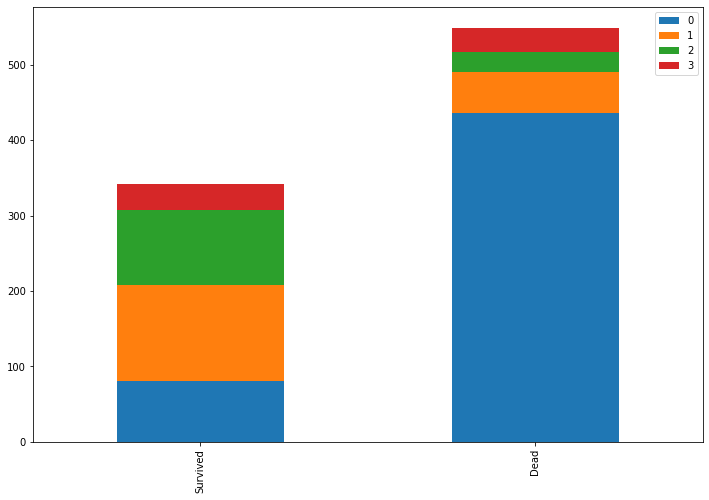

In [157]:
showChart('Title')

In [158]:
features2drop = ['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked']
train = train.drop(features2drop, axis=1)
test = test.drop(features2drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [159]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

In [160]:
#Decision Tree classifier is used here
clf = DecisionTreeClassifier()
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.79775281 0.78651685 0.78651685 0.86516854 0.78651685
 0.84269663 0.80898876 0.78651685 0.84269663]


In [161]:
#The score is calculated using decision tree classifier
scoreP = round(np.mean(score)*100, 2)
print('Decision Tree score: ' + str(scoreP) + '%')

Decision Tree score: 81.03%
